In [43]:
# import pandas as pd
# 
# boostrap_submission = pd.read_csv(
#     "/Users/zakotianskyi/PycharmProjects/prediction_competition_2023/submission/boostrapped/eval/cm/window=Y2019/metric=crps/crps.csv")
# 
# nbg_submission = pd.read_csv(
#     "/Users/zakotianskyi/PycharmProjects/prediction_competition_2023/submission/ng_boost_normal_d_80_n_300/eval/cm/window=Y2019/metric=crps/crps.csv")
# 
# submissions = [boostrap_submission, nbg_submission]
# 
# # calculate mean for each
# for sub in submissions:
#     print(sub[['value']].hist(bins=100))

In [44]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

# Path to the submission folder
base_path = "./submission"

# List of metrics
metrics = ['crps', 'ign', 'mis']

# Dictionary to hold all data
all_data = {}

# Process each metric
for metric in metrics:
    # Find all CSV files within the nested directories for each metric
    submission_files = glob.glob(f"{base_path}/**/{metric}.csv", recursive=True)

    # Dictionary to hold the dataframes grouped by submission name and year
    submissions = {}

    # Read each CSV file and store the dataframe in the dictionary grouped by submission name and year
    for file in submission_files:
        df = pd.read_csv(file)
        parts = file.split('/')
        submission_name = parts[2].replace('_', ' ').title()  # Adjust index based on your file path structure
        year = parts[5].split('=')[1]  # Extract year from the 'window=YYear' part
        if submission_name not in submissions:
            submissions[submission_name] = {}
        if year not in submissions[submission_name]:
            submissions[submission_name][year] = []
        submissions[submission_name][year].append(df['value'].mean())  # Store mean values

    # Merge the metric means into the all_data dictionary
    for submission_name, years_data in submissions.items():
        if submission_name not in all_data:
            all_data[submission_name] = {}
        for year, mean_values in years_data.items():
            if year not in all_data[submission_name]:
                all_data[submission_name][year] = {}
            all_data[submission_name][year][metric] = mean_values[0]  # There should be exactly one mean per metric

# Convert all_data to DataFrame
data_frames = {}
for submission, years_data in all_data.items():
    for year, metrics_data in years_data.items():
        index = (submission, year)
        data_frames[index] = metrics_data

# Create a multi-index DataFrame
result_df = pd.DataFrame.from_dict(data_frames, orient='index')
result_df.index = pd.MultiIndex.from_tuples(result_df.index, names=['Submission', 'Year'])

# Display the DataFrame
result_df

crps       ign         mis
Submission                        Year                                  
Benchmark Last Historical Poisson Y2019   9.640593  1.037815  175.834795
                                  Y2021  37.129253  1.227684  722.673604
                                  Y2020  13.698200  1.084218  256.184097
                                  Y2018  20.041059  1.190211  378.076614
Benchmark Boostrap                Y2019  22.074857  1.090364  419.315532
                                  Y2021  36.045139  1.129538  694.494786
                                  Y2020  21.269923  1.088269  402.353163
                                  Y2018  23.494130  1.109974  453.287544
Ng Boost Normal D 80 N 300        Y2019  32.951330  4.236816  275.575000
                                  Y2018  36.491634  4.326604  317.834926
Xg Boost                          Y2019  17.625218  3.093222  352.504363
                                  Y2020  22.536649  3.071479  450.732984
                                  Y2018  20.652705  3.088874  413.054101

In [45]:
submissions_2018 = result_df.xs('Y2018', level='Year').sort_values(by='crps')
submissions_2018

,crps,ign,mis
Submission,,,
Benchmark Last Historical Poisson,20.041059,1.190211,378.076614
Xg Boost,20.652705,3.088874,413.054101
Benchmark Boostrap,23.494130,1.109974,453.287544
Ng Boost Normal D 80 N 300,36.491634,4.326604,317.834926


In [46]:
submissions_2019 = result_df.xs('Y2019', level='Year').sort_values(by='crps')
submissions_2019

,crps,ign,mis
Submission,,,
Benchmark Last Historical Poisson,9.640593,1.037815,175.834795
Xg Boost,17.625218,3.093222,352.504363
Benchmark Boostrap,22.074857,1.090364,419.315532
Ng Boost Normal D 80 N 300,32.951330,4.236816,275.575000


In [47]:
submissions_2020 = result_df.xs('Y2020', level='Year').sort_values(by='crps')
submissions_2020

,crps,ign,mis
Submission,,,
Benchmark Last Historical Poisson,13.698200,1.084218,256.184097
Benchmark Boostrap,21.269923,1.088269,402.353163
Xg Boost,22.536649,3.071479,450.732984


In [48]:
submissions_2021 = result_df.xs('Y2021', level='Year').sort_values(by='crps')
submissions_2021

,crps,ign,mis
Submission,,,
Benchmark Boostrap,36.045139,1.129538,694.494786
Benchmark Last Historical Poisson,37.129253,1.227684,722.673604


['./submission/benchmark_last_historical_poisson/eval/cm/window=Y2019/metric=crps/crps.csv', './submission/benchmark_last_historical_poisson/eval/cm/window=Y2021/metric=crps/crps.csv', './submission/benchmark_last_historical_poisson/eval/cm/window=Y2020/metric=crps/crps.csv', './submission/benchmark_last_historical_poisson/eval/cm/window=Y2018/metric=crps/crps.csv', './submission/benchmark_boostrap/eval/cm/window=Y2019/metric=crps/crps.csv', './submission/benchmark_boostrap/eval/cm/window=Y2021/metric=crps/crps.csv', './submission/benchmark_boostrap/eval/cm/window=Y2020/metric=crps/crps.csv', './submission/benchmark_boostrap/eval/cm/window=Y2018/metric=crps/crps.csv', './submission/ng_boost_normal_d_80_n_300/eval/cm/window=Y2019/metric=crps/crps.csv', './submission/ng_boost_normal_d_80_n_300/eval/cm/window=Y2018/metric=crps/crps.csv', './submission/xg_boost/eval/cm/window=Y2019/metric=crps/crps.csv', './submission/xg_boost/eval/cm/window=Y2020/metric=crps/crps.csv', './submission/xg_bo

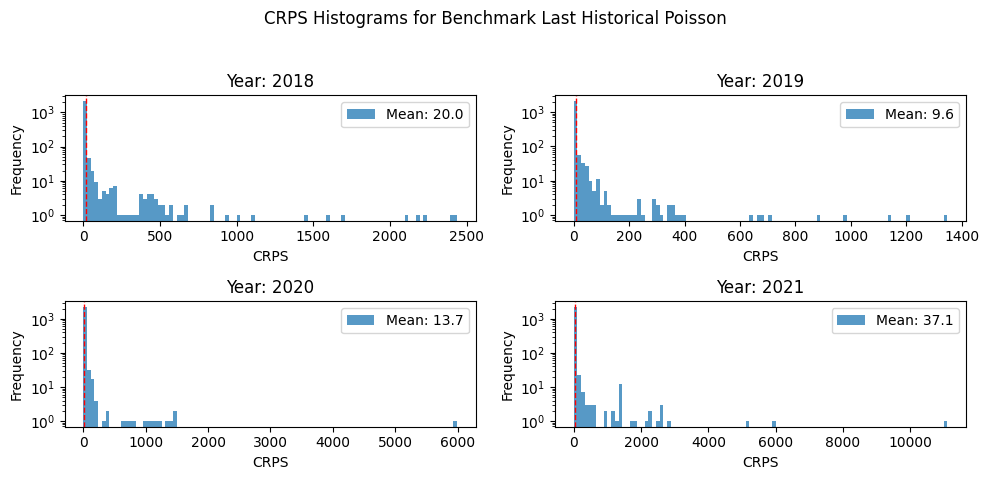

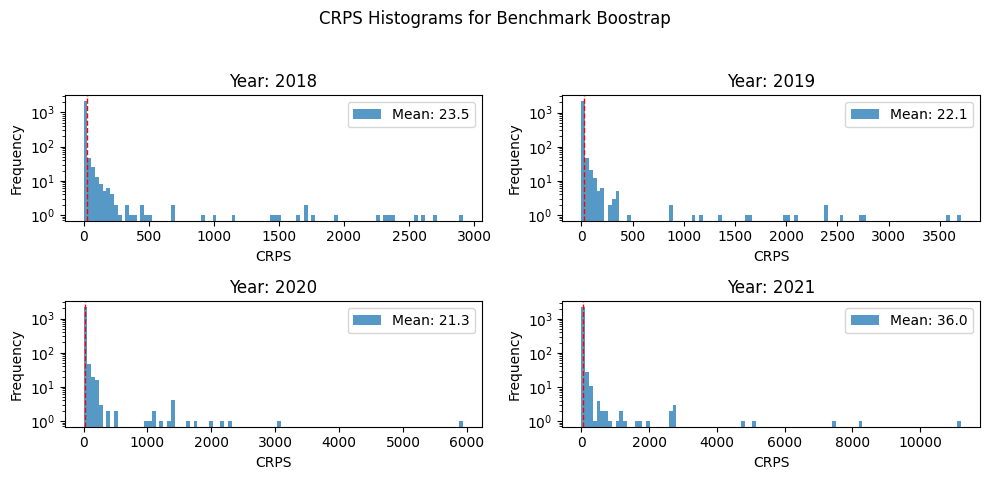

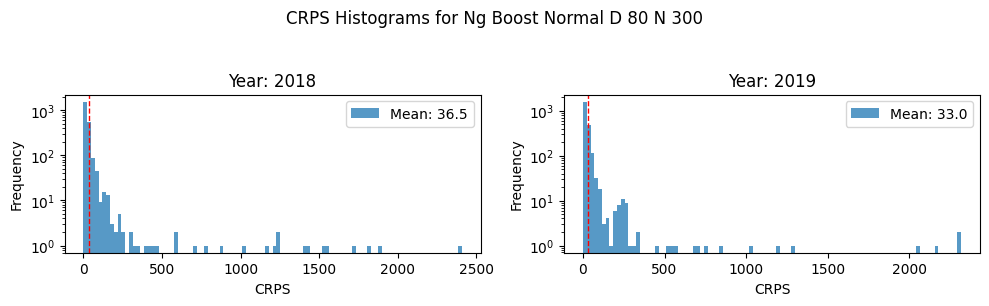

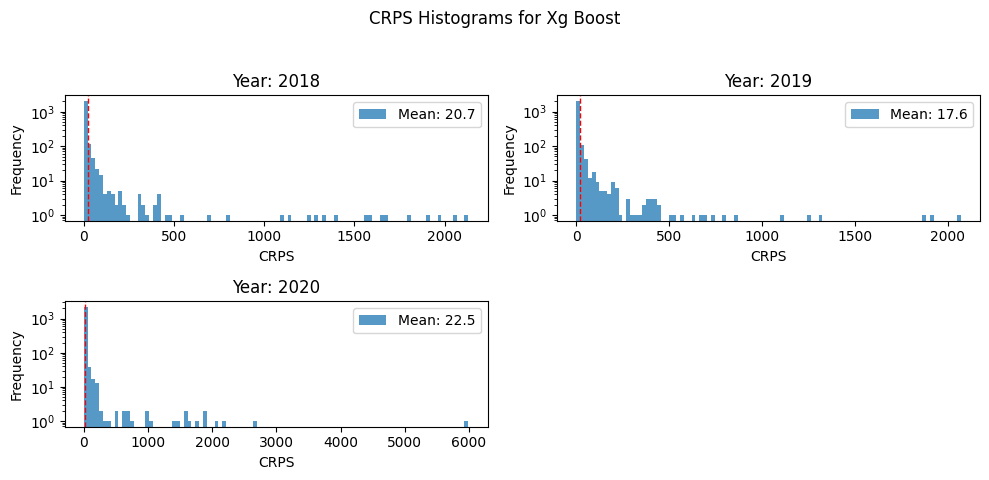

['./submission/benchmark_last_historical_poisson/eval/cm/window=Y2019/metric=ign/ign.csv', './submission/benchmark_last_historical_poisson/eval/cm/window=Y2021/metric=ign/ign.csv', './submission/benchmark_last_historical_poisson/eval/cm/window=Y2020/metric=ign/ign.csv', './submission/benchmark_last_historical_poisson/eval/cm/window=Y2018/metric=ign/ign.csv', './submission/benchmark_boostrap/eval/cm/window=Y2019/metric=ign/ign.csv', './submission/benchmark_boostrap/eval/cm/window=Y2021/metric=ign/ign.csv', './submission/benchmark_boostrap/eval/cm/window=Y2020/metric=ign/ign.csv', './submission/benchmark_boostrap/eval/cm/window=Y2018/metric=ign/ign.csv', './submission/ng_boost_normal_d_80_n_300/eval/cm/window=Y2019/metric=ign/ign.csv', './submission/ng_boost_normal_d_80_n_300/eval/cm/window=Y2018/metric=ign/ign.csv', './submission/xg_boost/eval/cm/window=Y2019/metric=ign/ign.csv', './submission/xg_boost/eval/cm/window=Y2020/metric=ign/ign.csv', './submission/xg_boost/eval/cm/window=Y2018

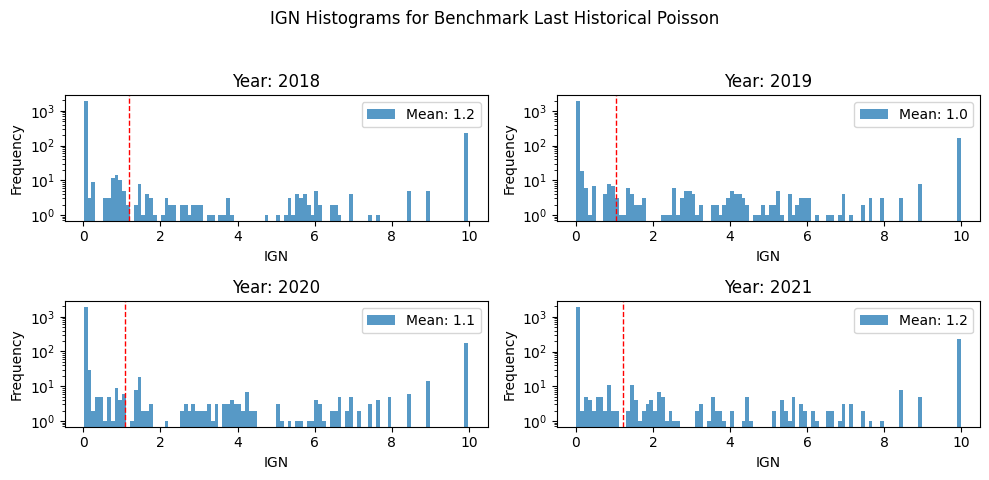

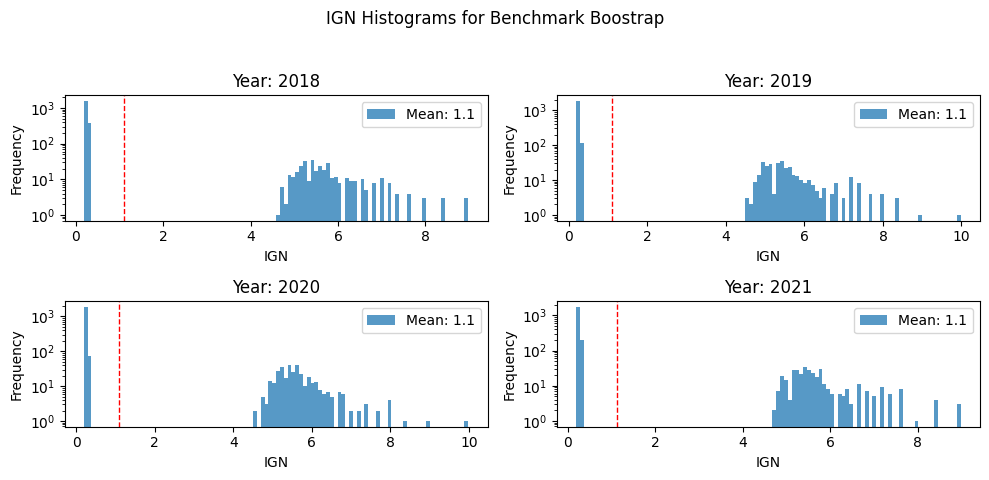

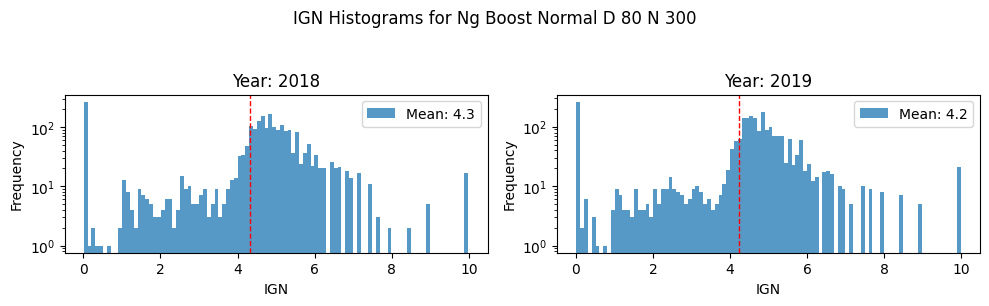

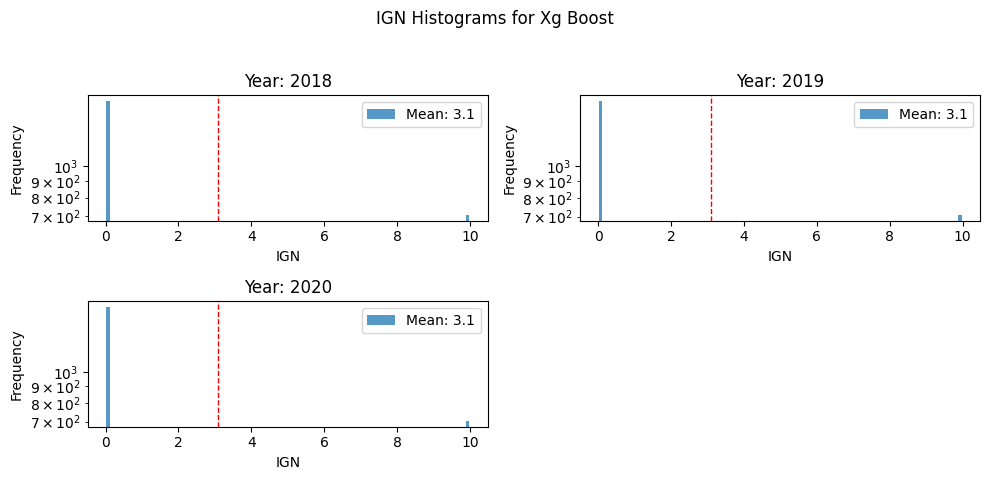

['./submission/benchmark_last_historical_poisson/eval/cm/window=Y2019/metric=mis/mis.csv', './submission/benchmark_last_historical_poisson/eval/cm/window=Y2021/metric=mis/mis.csv', './submission/benchmark_last_historical_poisson/eval/cm/window=Y2020/metric=mis/mis.csv', './submission/benchmark_last_historical_poisson/eval/cm/window=Y2018/metric=mis/mis.csv', './submission/benchmark_boostrap/eval/cm/window=Y2019/metric=mis/mis.csv', './submission/benchmark_boostrap/eval/cm/window=Y2021/metric=mis/mis.csv', './submission/benchmark_boostrap/eval/cm/window=Y2020/metric=mis/mis.csv', './submission/benchmark_boostrap/eval/cm/window=Y2018/metric=mis/mis.csv', './submission/ng_boost_normal_d_80_n_300/eval/cm/window=Y2019/metric=mis/mis.csv', './submission/ng_boost_normal_d_80_n_300/eval/cm/window=Y2018/metric=mis/mis.csv', './submission/xg_boost/eval/cm/window=Y2019/metric=mis/mis.csv', './submission/xg_boost/eval/cm/window=Y2020/metric=mis/mis.csv', './submission/xg_boost/eval/cm/window=Y2018

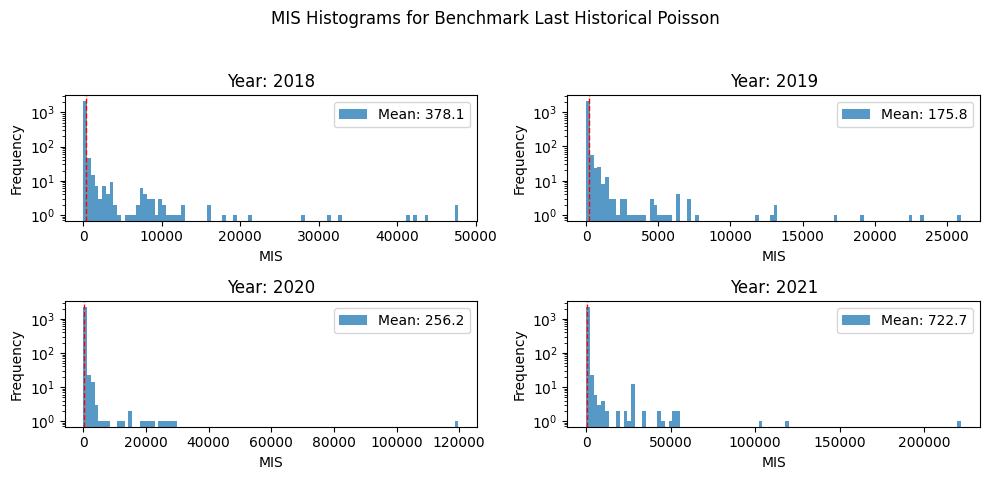

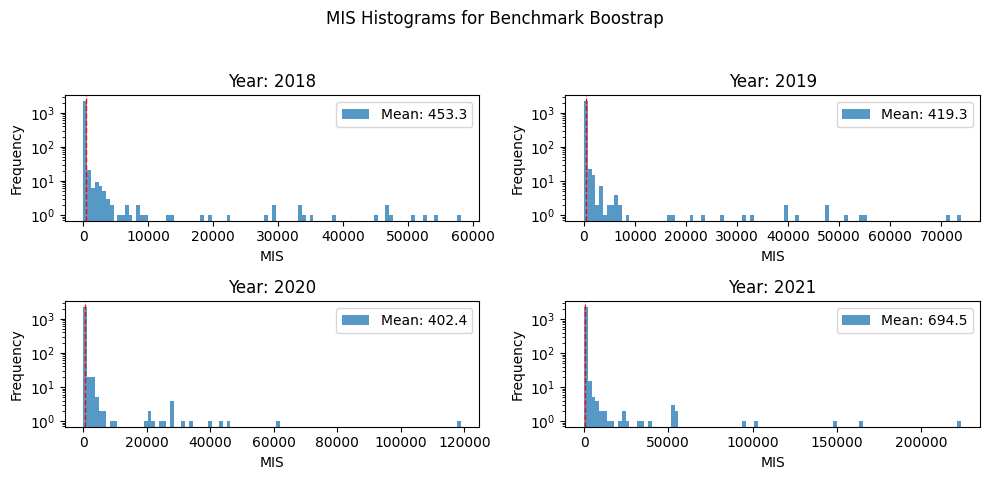

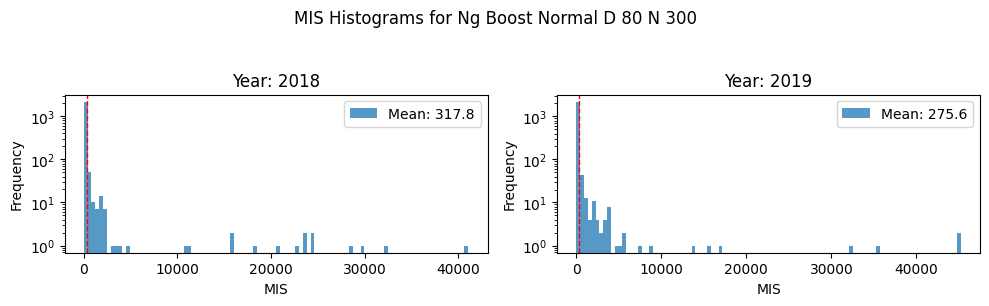

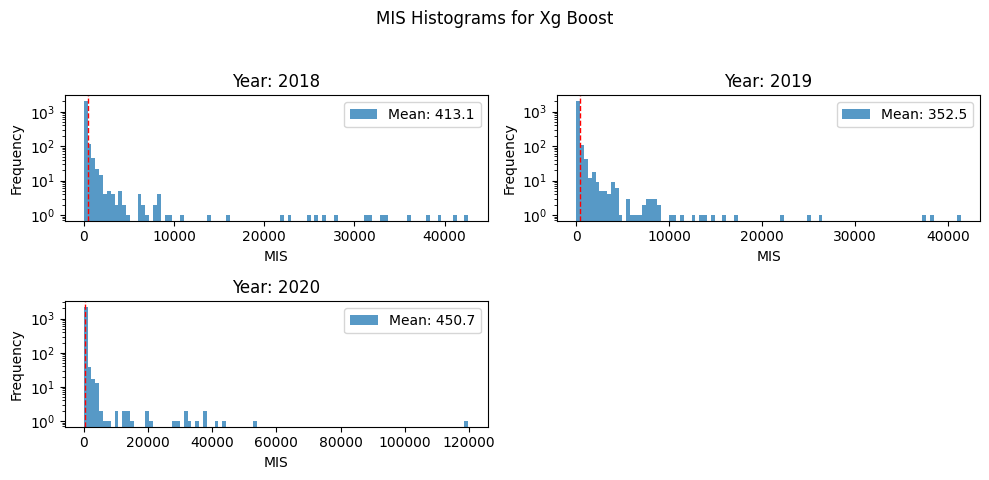

In [49]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

# Path to the submission folder
base_path = "./submission"

metrics = ['crps', 'ign', 'mis']

for metric in metrics:
    # Find all CSV files within the nested directories
    submission_files = glob.glob(f"{base_path}/**/{metric}.csv", recursive=True)
    print(submission_files)

    # Dictionary to hold the dataframes grouped by submission name and year
    submissions = {}

    # Read each CSV file and store the dataframe in the dictionary grouped by submission name and year
    for file in submission_files:
        df = pd.read_csv(file)
        parts = file.split('/')
        submission_name = parts[2].replace('_', ' ').title()  # Adjust index based on your file path structure
        year = parts[5].split('=')[1]  # Extract year from the 'window=YYear' part
        if submission_name not in submissions:
            submissions[submission_name] = {}
        submissions[submission_name][year] = df

    # Create a figure for each submission
    for submission_name, years_data in submissions.items():
        num_years = len(years_data)
        plt.figure(figsize=(10, 5))
        plt.suptitle(f'{metric.upper()} Histograms for {submission_name}')

        # Create subplots for each year in a 2x2 grid
        for index, (year, df) in enumerate(sorted(years_data.items()), start=1):
            plt.subplot(2, 2, index)
            plt.hist(df['value'], bins=100, alpha=0.75, label=f'Year: {year}')
            mean_value = df['value'].mean()
            plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=1)
            plt.title(f'Year: {year[1:]}')
            plt.xlabel(metric.upper())
            plt.ylabel('Frequency')
            # log
            plt.yscale('log')
            # plt.xscale('log')
            # mean_value = sub['value'].mean()
            # plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=1)
            plt.legend([f'Mean: {mean_value:.1f}'])

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to not overlap with the suptitle
        plt.show()
